In [312]:
import pandas as pd
from lifelines import WeibullAFTFitter, LogLogisticAFTFitter, LogNormalAFTFitter
import matplotlib.pyplot as plt

In [257]:
data = pd.read_csv("telco.csv")

In [258]:
df = data.iloc[:, 1:]

In [259]:
df.head(), df.tail()

(   region  tenure  age    marital  address  income  \
 0  Zone 2      13   44    Married        9      64   
 1  Zone 3      11   33    Married        7     136   
 2  Zone 3      68   52    Married       24     116   
 3  Zone 2      33   33  Unmarried       12      33   
 4  Zone 2      23   30    Married        9      30   
 
                              ed retire  gender voice internet forward  \
 0                College degree     No    Male    No       No     Yes   
 1     Post-undergraduate degree     No    Male   Yes       No     Yes   
 2  Did not complete high school     No  Female    No       No      No   
 3            High school degree     No  Female    No       No      No   
 4  Did not complete high school     No    Male    No       No     Yes   
 
          custcat churn  
 0  Basic service   Yes  
 1  Total service   Yes  
 2   Plus service    No  
 3  Basic service   Yes  
 4   Plus service    No  ,
      region  tenure  age    marital  address  income  \
 995  Zo

In [260]:
df.describe()

,tenure,age,address,income
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.526000,41.684000,11.551000,77.535000
std,21.359812,12.558816,10.086681,107.044165
min,1.000000,18.000000,0.000000,9.000000
25%,17.000000,32.000000,3.000000,29.000000
50%,34.000000,40.000000,9.000000,47.000000
75%,54.000000,51.000000,18.000000,83.000000
max,72.000000,77.000000,55.000000,1668.000000


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    1000 non-null   object
 1   tenure    1000 non-null   int64 
 2   age       1000 non-null   int64 
 3   marital   1000 non-null   object
 4   address   1000 non-null   int64 
 5   income    1000 non-null   int64 
 6   ed        1000 non-null   object
 7   retire    1000 non-null   object
 8   gender    1000 non-null   object
 9   voice     1000 non-null   object
 10  internet  1000 non-null   object
 11  forward   1000 non-null   object
 12  custcat   1000 non-null   object
 13  churn     1000 non-null   object
dtypes: int64(4), object(10)
memory usage: 109.5+ KB


In [262]:
len(df.columns)

14

In [263]:
df['churn'].unique(), df['tenure'].unique(), df['region'].unique()

(array(['Yes', 'No'], dtype=object),
 array([13, 11, 68, 33, 23, 41, 45, 38,  5,  7, 57,  9, 29, 60, 34,  1, 26,
         6, 53, 55, 14, 42, 25, 56, 71, 35, 20, 54, 44, 72, 10, 15, 27, 64,
        65, 49, 47, 30, 52, 36, 58, 69, 28, 16,  3, 40, 48,  8, 67,  2, 31,
        62,  4, 17, 43, 12, 61, 59, 51, 19, 22, 70, 50, 46, 39, 24, 21, 18,
        63, 37, 66, 32]),
 array(['Zone 2', 'Zone 3', 'Zone 1'], dtype=object))

In [264]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [265]:
Weibull =  WeibullAFTFitter()
LogLogistic = LogLogisticAFTFitter()
LogNormal = LogNormalAFTFitter()

In [266]:
Weibull.fit(df, duration_col = "tenure", event_col = 'churn_Yes')
LogLogistic.fit(df, duration_col = "tenure", event_col = 'churn_Yes')
LogNormal.fit(df, duration_col = "tenure", event_col = 'churn_Yes')

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

In [267]:
Weibull.BIC_, LogLogistic.BIC_, LogNormal.BIC_

(2938.1587586418455, 2930.024072001298, 2927.8395208096767)

In [268]:
Weibull.AIC_, LogLogistic.AIC_, LogNormal.AIC_

(2964.343248083881, 2956.2085614433336, 2954.0240102517123)

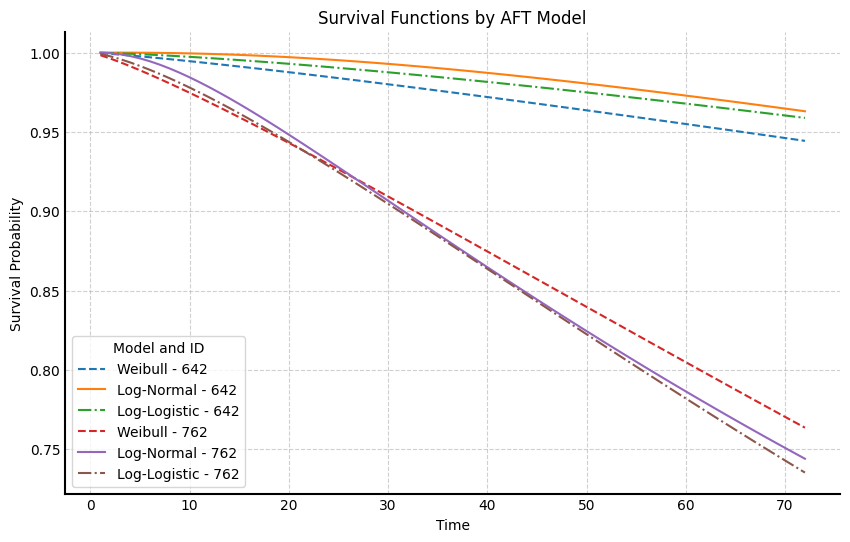

In [269]:
sample = df.sample(2, random_state=3)

Weibull_pred = Weibull.predict_survival_function(sample)
LogNormal_pred = LogNormal.predict_survival_function(sample)
LogLogistic_pred = LogLogistic.predict_survival_function(sample)

plt.figure(figsize=(10, 6))
for i, col in enumerate(sample.index):
    plt.plot(Weibull_pred.index, Weibull_pred[col], linestyle='--', label=f'Weibull - {col}')
    plt.plot(LogNormal_pred.index, LogNormal_pred[col], linestyle='-', label=f'Log-Normal - {col}')
    plt.plot(LogLogistic_pred.index, LogLogistic_pred[col], linestyle='-.', label=f'Log-Logistic - {col}')



plt.xlabel('Time')
plt.ylabel('Survival Probability')

plt.title('Survival Functions by AFT Model')

plt.legend(title="Model and ID")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

plt.gca().tick_params(axis='both', which='both', length=0)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('pretty_survival_functions.png', format='png', dpi=300)

plt.show()

In [270]:
initial_model = WeibullAFTFitter().fit(df, 'tenure', 'churn_Yes')
model_summary = initial_model.summary
significant_vars = model_summary['p'] < 0.05
required_vars = ['tenure', 'churn_Yes']
for i, j in enumerate(significant_vars[significant_vars][:-2]): 
    required_vars.append(significant_vars[significant_vars].index.tolist()[i][1])
filtered_df = df[required_vars]
final_weibull_model = WeibullAFTFitter().fit(filtered_df, 'tenure', 'churn_Yes')
final_weibull_model.summary

coef  exp(coef)  se(coef)  \
param   covariate                                                        
lambda_ address                          0.042526   1.043444  0.008853   
        age                              0.030797   1.031276  0.005977   
        custcat_E-service                0.962393   2.617954  0.156810   
        custcat_Plus service             0.675983   1.965964  0.166146   
        custcat_Total service            0.879235   2.409056  0.185880   
        ed_Did not complete high school  0.273207   1.314172  0.179996   
        ed_High school degree            0.168967   1.184081  0.130267   
        internet_Yes                    -0.789368   0.454132  0.137685   
        marital_Unmarried               -0.327434   0.720771  0.104642   
        voice_Yes                       -0.298269   0.742102  0.146145   
        Intercept                        2.885065  17.904733  0.232132   
rho_    Intercept                        0.165323   1.179774  0.050946   

                                         coef lower 95%  coef upper 95%  \
param   covariate                                                         
lambda_ address                                0.025176        0.059877   
        age                                    0.019083        0.042510   
        custcat_E-service                      0.655052        1.269735   
        custcat_Plus service                   0.350342        1.001624   
        custcat_Total service                  0.514917        1.243553   
        ed_Did not complete high school       -0.079580        0.625993   
        ed_High school degree                 -0.086351        0.424286   
        internet_Yes                          -1.059226       -0.519510   
        marital_Unmarried                     -0.532528       -0.122340   
        voice_Yes                             -0.584709       -0.011829   
        Intercept                              2.430095        3.340036   
rho_    Intercept                              0.065471        0.265174   

                                         exp(coef) lower 95%  \
param   covariate                                              
lambda_ address                                     1.025495   
        age                                         1.019266   
        custcat_E-service                           1.925242   
        custcat_Plus service                        1.419553   
        custcat_Total service                       1.673499   
        ed_Did not complete high school             0.923504   
        ed_High school degree                       0.917272   
        internet_Yes                                0.346724   
        marital_Unmarried                           0.587119   
        voice_Yes                                   0.557268   
        Intercept                                  11.359957   
rho_    Intercept                                   1.067662   

                                         exp(coef) upper 95%  cmp to  \
param   covariate                                                      
lambda_ address                                     1.061706     0.0   
        age                                         1.043427     0.0   
        custcat_E-service                           3.559908     0.0   
        custcat_Plus service                        2.722700     0.0   
        custcat_Total service                       3.467913     0.0   
        ed_Did not complete high school             1.870102     0.0   
        ed_High school degree                       1.528498     0.0   
        internet_Yes                                0.594812     0.0   
        marital_Unmarried                           0.884847     0.0   
        voice_Yes                                   0.988241     0.0   
        Intercept                                  28.220131     0.0   
rho_    Intercept                                   1.303658     0.0   

                                                 z 

In [271]:
initial_model = LogNormalAFTFitter().fit(df, 'tenure', 'churn_Yes')
model_summary = initial_model.summary
significant_vars = model_summary['p'] < 0.05
required_vars = ['tenure', 'churn_Yes']
for i, j in enumerate(significant_vars[significant_vars][:-2]): 
    required_vars.append(significant_vars[significant_vars].index.tolist()[i][1])
filtered_df = df[required_vars]
final_lognormal_model = LogNormalAFTFitter().fit(filtered_df, 'tenure', 'churn_Yes')
final_lognormal_model.summary

coef  exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                              
mu_    address                0.042824   1.043754  0.008847        0.025483   
       age                    0.036826   1.037512  0.006400        0.024283   
       custcat_E-service      1.025825   2.789395  0.169047        0.694499   
       custcat_Plus service   0.822553   2.276303  0.169425        0.490485   
       custcat_Total service  1.013269   2.754590  0.209579        0.602501   
       internet_Yes          -0.840528   0.431483  0.138259       -1.111511   
       marital_Unmarried     -0.447317   0.639341  0.114472       -0.671679   
       voice_Yes             -0.463493   0.629082  0.166771       -0.790359   
       Intercept              2.534887  12.615010  0.242611        2.059379   
sigma_ Intercept              0.283034   1.327150  0.046020        0.192836   

                              coef upper 95%  exp(coef) lower 95%  \
param  covariate                                                    
mu_    address                      0.060164             1.025811   
       age                          0.049369             1.024580   
       custcat_E-service            1.357150             2.002706   
       custcat_Plus service         1.154620             1.633109   
       custcat_Total service        1.424036             1.826682   
       internet_Yes                -0.569545             0.329061   
       marital_Unmarried           -0.222956             0.510850   
       voice_Yes                   -0.136628             0.453682   
       Intercept                    3.010396             7.841100   
sigma_ Intercept                    0.373231             1.212684   

                              exp(coef) upper 95%  cmp to          z  \
param  covariate                                                       
mu_    address                           1.062011     0.0   4.840293   
       age                               1.050608     0.0   5.754395   
       custcat_E-service                 3.885105     0.0   6.068295   
       custcat_Plus service              3.172818     0.0   4.854960   
       custcat_Total service             4.153852     0.0   4.834781   
       internet_Yes                      0.565783     0.0  -6.079365   
       marital_Unmarried                 0.800150     0.0  -3.907654   
       voice_Yes                         0.872294     0.0  -2.779221   
       Intercept                        20.295430     0.0  10.448373   
sigma_ Intercept                         1.452420     0.0   6.150258   

                                         p   -log2(p)  
param  covariate                                       
mu_    address                1.296478e-06  19.556971  
       age                    8.695261e-09  26.777123  
       custcat_E-service      1.292752e-09  29.526907  
       custcat_Plus service   1.204113e-06  19.663598  
       custcat_Total service  1.332924e-06  19.516974  
       internet_Yes           1.206593e-09  29.626414  
       marital_Unmarried      9.319665e-05  13.389362  
       voice_Yes              5.448947e-03   7.519807  
       Intercept              1.490611e-25  82.472298  
sigma_ Intercept              7.735690e-10  30.267751

In [272]:
initial_model = LogLogisticAFTFitter().fit(df, 'tenure', 'churn_Yes')
model_summary = initial_model.summary
significant_vars = model_summary['p'] < 0.05
required_vars = ['tenure', 'churn_Yes']
for i, j in enumerate(significant_vars[significant_vars][:-2]): 
    required_vars.append(significant_vars[significant_vars].index.tolist()[i][1])
filtered_df = df[required_vars]
final_loglogistic_model = LogLogisticAFTFitter().fit(filtered_df, 'tenure', 'churn_Yes')
final_loglogistic_model.summary

coef  exp(coef)  se(coef)  \
param  covariate                                                        
alpha_ address                          0.038659   1.039416  0.008761   
       age                              0.035661   1.036304  0.006159   
       custcat_E-service                1.029472   2.799586  0.164726   
       custcat_Plus service             0.735692   2.086925  0.168030   
       custcat_Total service            1.036790   2.820151  0.204405   
       ed_Did not complete high school  0.294824   1.342890  0.181330   
       ed_High school degree            0.213616   1.238147  0.135842   
       internet_Yes                    -0.821308   0.439856  0.141289   
       marital_Unmarried               -0.425593   0.653382  0.110336   
       voice_Yes                       -0.401298   0.669451  0.160963   
       Intercept                        2.421680  11.264770  0.244970   
beta_  Intercept                        0.333737   1.396176  0.050933   

                                        coef lower 95%  coef upper 95%  \
param  covariate                                                         
alpha_ address                                0.021487        0.055831   
       age                                    0.023589        0.047733   
       custcat_E-service                      0.706615        1.352329   
       custcat_Plus service                   0.406358        1.065025   
       custcat_Total service                  0.636165        1.437416   
       ed_Did not complete high school       -0.060576        0.650224   
       ed_High school degree                 -0.052629        0.479861   
       internet_Yes                          -1.098230       -0.544387   
       marital_Unmarried                     -0.641848       -0.209338   
       voice_Yes                             -0.716780       -0.085815   
       Intercept                              1.941548        2.901812   
beta_  Intercept                              0.233911        0.433563   

                                        exp(coef) lower 95%  \
param  covariate                                              
alpha_ address                                     1.021719   
       age                                         1.023869   
       custcat_E-service                           2.027117   
       custcat_Plus service                        1.501340   
       custcat_Total service                       1.889222   
       ed_Did not complete high school             0.941222   
       ed_High school degree                       0.948732   
       internet_Yes                                0.333461   
       marital_Unmarried                           0.526319   
       voice_Yes                                   0.488322   
       Intercept                                   6.969531   
beta_  Intercept                                   1.263531   

                                        exp(coef) upper 95%  cmp to         z  \
param  covariate                                                                
alpha_ address                                     1.057419     0.0  4.412357   
       age                                         1.048890     0.0  5.789681   
       custcat_E-service                           3.866419     0.0  6.249600   
       custcat_Plus service                        2.900912     0.0  4.378328   
       custcat_Total service                       4.209804     0.0  5.072247   
       ed_Did not complete high school             1.915971     0.0  1.625900   
       ed_High school degree                       1.615850     0.0  1.572534   
       internet_Yes                                0.580197     0.0 -5.812967   
       marital_Unmarried                           0.811121     0.0 -3.857234   
       voice_Yes                                   0.917764     0.0 -2.493100   
       Intercept                                  18.207113     0.0  9.885623   
beta_  Intercept                                

Above I left only the coefficients that had pvalue with a significance level of less than 0.5. Positive coefficients have effect of increase in the survavial time and the negatives vice versa. 

Log-Normal model has the least AIC, BIC values, uses the least number of coefficients and is the simplest one. For the following reasons I will choose Log-Normal.

In [273]:
Avg_MM = 500

In [274]:
expected_lifetimes = final_lognormal_model.predict_expectation(filtered_df)
filtered_df['CLV'] = expected_lifetimes * Avg_MM
average_clv = filtered_df['CLV'].mean()
print(f"Average Customer Lifetime Value: {int(average_clv)}$")

Average Customer Lifetime Value: 224477$


/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/121818933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CLV'] = expected_lifetimes * Avg_MM


In [275]:
df1 = filtered_df.loc[filtered_df['marital_Unmarried'] == True]
df2 = filtered_df.loc[filtered_df['marital_Unmarried'] == False]

In [276]:
expected_lifetimes_Unmarried = final_lognormal_model.predict_expectation(df1)
df1['CLV'] = expected_lifetimes * Avg_MM
average_clv = df1['CLV'].mean()
print(f"Average Unmarried Customer Lifetime Value: {int(average_clv)}$")

Average Unmarried Customer Lifetime Value: 182589$


/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/1539005793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLV'] = expected_lifetimes * Avg_MM


In [277]:
expected_lifetimes_Unmarried = final_lognormal_model.predict_expectation(df2)
df2['CLV'] = expected_lifetimes * Avg_MM
average_clv = df2['CLV'].mean()
print(f"Average Married Customer Lifetime Value: {int(average_clv)}")

Average Married Customer Lifetime Value: 267212


/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/1116415135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CLV'] = expected_lifetimes * Avg_MM


Above findings show that Married customers bring more value in average than not married ones.

In [250]:
df1 = filtered_df.loc[filtered_df['voice_Yes'] == True]
df2 = filtered_df.loc[filtered_df['voice_Yes'] == False]

In [279]:
expected_lifetimes_Unmarried = final_lognormal_model.predict_expectation(df1)
df1['CLV'] = expected_lifetimes * Avg_MM
average_clv = df1['CLV'].mean()
print(f"Average Voice:YES Customer Lifetime Value: {int(average_clv)}$")

Average Voice:YES Customer Lifetime Value: 182589$


/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/2589730417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLV'] = expected_lifetimes * Avg_MM


In [280]:
expected_lifetimes_Unmarried = final_lognormal_model.predict_expectation(df2)
df2['CLV'] = expected_lifetimes * Avg_MM
average_clv = df2['CLV'].mean()
print(f"Average Voice:NO Customer Lifetime Value: {int(average_clv)}")

Average Voice:NO Customer Lifetime Value: 267212


/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/3445202773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CLV'] = expected_lifetimes * Avg_MM


Customers with voice: NO bring more value to the company.

In [284]:
df1 = filtered_df.loc[filtered_df['internet_Yes'] == True]
df2 = filtered_df.loc[filtered_df['internet_Yes'] == False]

In [285]:
expected_lifetimes_Unmarried = final_lognormal_model.predict_expectation(df1)
df1['CLV'] = expected_lifetimes * Avg_MM
average_clv = df1['CLV'].mean()
print(f"Average internet:YES Customer Lifetime Value: {int(average_clv)}$")

Average internet:YES Customer Lifetime Value: 97115$


/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/3537614883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLV'] = expected_lifetimes * Avg_MM


In [286]:
expected_lifetimes_Unmarried = final_lognormal_model.predict_expectation(df2)
df2['CLV'] = expected_lifetimes * Avg_MM
average_clv = df2['CLV'].mean()
print(f"Average internet:NO Customer Lifetime Value: {int(average_clv)}")

Average internet:NO Customer Lifetime Value: 298637


/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/1120774213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CLV'] = expected_lifetimes * Avg_MM


Thus if we view the segment where our significant, dummy coefficients have positive effect on the CLV,  that will be our champions customers. Example: Customers with Internet: NO, Married and Voice: NO is valueable segment.

In [316]:
filtered_df['Survival_Probability'] = final_lognormal_model.predict_survival_function(filtered_df, times=12).T[12]
#time = 12 for a year
threshold = 0.8
filtered_df['At_Risk'] = filtered_df['Survival_Probability'] < threshold

/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/3706366816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Survival_Probability'] = final_lognormal_model.predict_survival_function(filtered_df, times=12).T[12]
/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/3706366816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['At_Risk'] = filtered_df['Survival_Probability'] < threshold


In [315]:
retention_budget_percent = 0.10
filtered_df['Retention_Budget'] = filtered_df['CLV'] * retention_budget_percent * filtered_df['At_Risk']
total_retention_budget = filtered_df['Retention_Budget'].sum()

/var/folders/lf/lmlbyf613pjgkwp2bzmmr37m0000gn/T/ipykernel_9038/1617604906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Retention_Budget'] = filtered_df['CLV'] * retention_budget_percent * filtered_df['At_Risk']


In [311]:
total_retention_budget

596266.2550935985

I would suggest to find the weakest segment and plan a budget on advertisements targeted on them for the visibility and attraction which will lead to increase of retention rate.